# 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 성취 목표
- 모델 설계, 손실함수 정의와 기울기 계산을 구현

## 1. 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
diabetes_loaded = load_diabetes()

In [3]:
X = diabetes_loaded.data
y = diabetes_loaded.target

In [4]:
# ndarray -> DataFrame
df_X = pd.DataFrame(data=X, columns=diabetes_loaded.feature_names)
display(df_X.head())
print(df_X.shape)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


(442, 10)


In [5]:
df_y = pd.DataFrame(data=y, columns=["diabetes"])
display(df_y.head())
print(df_y.shape)

,diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


(442, 1)


## 2. 모델에 입력할 데이터 X 준비하기

In [6]:
type(X)

numpy.ndarray

## 3. 모델에 예측할 데이터 y 준비하기

In [7]:
type(y)

numpy.ndarray

## 4. train 데이터와 test 데이터로 분리하기

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## 5. 모델 준비하기

In [9]:
W = np.random.rand(10)
b = np.random.rand()

W,b

(array([0.4645523 , 0.29530541, 0.66747697, 0.22777052, 0.31703867,
        0.66125358, 0.40149654, 0.60919726, 0.99086853, 0.86618563]),
 0.9357056953536155)

In [10]:
def model(X, W, b):
    predictions = 0      # 변수 선언 & 초기화
    for i in range(10):     # feature는 10개
        predictions += X[:, i] * W[i]        # 한 feature의 데이터들과 가중치 곱
    predictions += b
    return predictions

## 6. 손실함수 loss 정의하기

In [11]:
def MSE(y_true, y_pred):
#     error = (y_true - y_pred)
#     squared = error **2
#     mean_ = np.mean(squared)
    mse = np.mean((y_true-y_pred)**2)
    return mse

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7. 기울기를 구하는 gradient 함수 구현하기

In [13]:
def gradient(X, W, b, y):
    # 데이터 갯수
    N = len(y)
    
    # y_pred
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred -y)
    
    db = np.mean(2 * (y_pred - y))
    
    return dW, db
    

## 8. 하이퍼 파라미터인 학습률 설정하기

In [14]:
LEARNING_RATE = 0.5

## 9. 모델 학습하기

In [15]:
losses = []

for i in range(1, 10000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    # 학습 경과 출력
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 4012.8600
Iteration 200 : Loss 3490.7103
Iteration 300 : Loss 3264.7036
Iteration 400 : Loss 3138.2297
Iteration 500 : Loss 3060.0176
Iteration 600 : Loss 3009.9298
Iteration 700 : Loss 2977.3506
Iteration 800 : Loss 2955.9370
Iteration 900 : Loss 2941.7292
Iteration 1000 : Loss 2932.2122
Iteration 1100 : Loss 2925.7723
Iteration 1200 : Loss 2921.3667
Iteration 1300 : Loss 2918.3164
Iteration 1400 : Loss 2916.1768
Iteration 1500 : Loss 2914.6541
Iteration 1600 : Loss 2913.5534
Iteration 1700 : Loss 2912.7439
Iteration 1800 : Loss 2912.1375
Iteration 1900 : Loss 2911.6741
Iteration 2000 : Loss 2911.3126
Iteration 2100 : Loss 2911.0243
Iteration 2200 : Loss 2910.7893
Iteration 2300 : Loss 2910.5934
Iteration 2400 : Loss 2910.4265
Iteration 2500 : Loss 2910.2814
Iteration 2600 : Loss 2910.1527
Iteration 2700 : Loss 2910.0365
Iteration 2800 : Loss 2909.9300
Iteration 2900 : Loss 2909.8310
Iteration 3000 : Loss 2909.7378
Iteration 3100 : Loss 2909.6492
Iteration 3200 : 

## 10. test 데이터에 대한 성능 확인하기

In [16]:
W, b

(array([ -62.24052391, -223.9402382 ,  535.40020584,  257.12741318,
        -152.17704422,  -67.09954564, -148.39969615,  156.90632798,
         579.45961333,   37.28262132]),
 152.1862238177471)

In [17]:
prediction = model(X_test, W, b)
mse = MSE(y_test, prediction)
mse

2881.8013532363025

## 11. 정답 데이터와 예측한 데이터 시각화하기

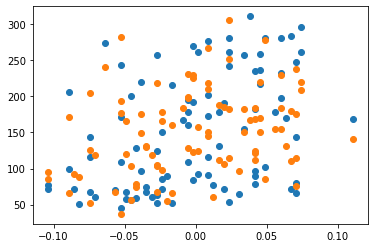

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()